# Personal preprocessing
* product_category
* product_subcategory 
* product_modelname 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def set_up(mode= None):
    pd.set_option('display.max_rows', mode)
# pd.options.display.max_rows = 60
set_up()

In [26]:
df_train = pd.read_csv("../train.csv") # 학습용 데이터
df_test = pd.read_csv("../submission.csv") # 테스트 데이터(제출파일의 데이터)

# 데이터 계수 파악
len(df_train), len(df_test)

(59299, 5271)

In [27]:
df_test.columns

Index(['id', 'bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'id_strategic_ver', 'it_strategic_ver',
       'idit_strategic_ver', 'customer_job', 'lead_desc_length',
       'inquiry_type', 'product_category', 'product_subcategory',
       'product_modelname', 'customer_country.1', 'customer_position',
       'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea', 'lead_owner', 'is_converted'],
      dtype='object')

## 신규 Columns 추가
---
* 밴 다이어그램을 통한 분류화
* 사람의 관심도를 표현하기 위해서 `customer_interest`로 명명.


In [28]:
def label_rows(row):
    if row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 8
    elif row['product_modelname'] is np.nan and row['product_subcategory'] is np.nan:
        return 7
    elif row['product_modelname'] is np.nan and row['product_category'] is np.nan:
        return 6
    elif row['product_subcategory'] is np.nan and row['product_category'] is np.nan:
        return 5
    elif row['product_modelname'] is np.nan:
        return 4
    elif row['product_subcategory'] is np.nan:
        return 3
    elif row['product_category'] is np.nan:
        return 2
    else:
        return 1

df_train['customer_interest'] = df_train.apply(lambda row: label_rows(row), axis=1)
df_train[['product_modelname', 'product_subcategory', 'product_category']] = df_train[['product_modelname', 'product_subcategory', 'product_category']].fillna('Unknown') # 그 후 널값 채우기

## 결과

In [29]:
df_train.groupby('customer_interest')['is_converted'].mean()

customer_interest
1    0.147267
2    0.087719
3    0.102041
4    0.145729
5    0.005242
6    0.117021
7    0.076323
8    0.064555
Name: is_converted, dtype: float64

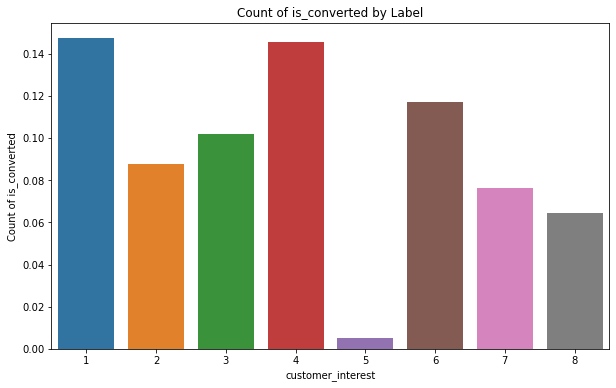

In [30]:
label_converted_count = df_train.groupby('customer_interest')['is_converted'].mean().reset_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_interest', y='is_converted', data=label_converted_count)
plt.xlabel('customer_interest')
plt.ylabel('Count of is_converted')
plt.title('Count of is_converted by Label')
plt.show()

## product_category 정리
* LG BTB 마케팅의 입력 양식을 참고
* 종류

In [31]:
df_train['product_category'] = df_train['product_category'].str.lower().str.strip()

In [32]:
# washing machine 추가
mask = df_train['product_category'] == 'commercial tv,projector'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'projector'
# 원본 데이터 프레임에 데이터 추가 
df_train = pd.concat([df_train, copy_df])

# dryer 추가
mask = df_train['product_category'] == 'commercial tv,projector'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'commercial tv'
df_train = pd.concat([df_train, copy_df])

# 원본데이터 삭제.
df_train = df_train[df_train['product_category'] != 'commercial tv,projector']

In [33]:
# washing machine 추가
mask = df_train['product_category'] == 'washing machine,dryer'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'washing machine'
# 원본 데이터 프레임에 데이터 추가 
df_train = pd.concat([df_train, copy_df])

# dryer 추가
mask = df_train['product_category'] == 'washing machine,dryer'
copy_df = df_train[mask].copy()
copy_df['product_category'] = 'dryer'
df_train = pd.concat([df_train, copy_df])

# 원본데이터 삭제.
df_train = df_train[df_train['product_category'] != 'washing machine,dryer']

In [35]:
replacement_dict = {
    'interactive signage': 'interactive digital board',    'education createboard': 'interactive digital board',
    '互動式顯示屏': 'interactive digital board',    'multi inverter': 'multi-split',
    'multi split' : 'multi-split',    'video wall': 'video wall signage',
    'videowall_rmk': 'video wall signage',    '43us660h0sd.awz': 'hotel tv',   'residential air conditioner': 'rac',
    'aire acondicionado residencial': 'rac',    'ar condicionado residencial' : 'rac',
    'all lg vrf systems': 'vrf',    'ur640': 'ur640s',    'idb': 'interactive digital board',
    'id': 'interactive digital board',    'others': 'etc.',
    'other': 'etc.',    'lainnya': 'etc.',
    'otros': 'etc.',    'sales inquiry': 'etc.',    'commercial tv,tv': 'commercial tv',
    'monitor signage,commercial tv': 'commercial tv',    'onequick series': 'one:quick',
    'lg one:quick': 'one:quick',    'led 顯示屏': 'led signage',
    '32lq621cbsb.awz': 'smart tv signage',    'monitor signage,commercial tv,monior/monitor tv': 'monitor signage,monior/monitor tv',
    'monior/monitor tv,tv': 'monitor signage,monior/monitor tv',    'monitor signage,tv': 'monitor signage,monior/monitor tv',
    'monior/monitor tv,pc': 'monitor signage,monior/monitor tv',    'monitor signage,pc': 'monitor signage,monior/monitor tv',
    'isıtma': 'heating',    'calefacción': 'heating',    'ogrzewanie (pompy ciepła)' : 'heating',
    'standalone': 'commercial tv',    'system ac': 'single-split',  
    'điều hòa trung tâm multi': 'single-split',
    'sac' : 'single-split',    'fhd series': 'standard signage',
    'tv signage': 'standard signage',    'oled 顯示屏': 'oled signage',
    'מזגנים למקום מגורים': 'rac',    'htv': 'commercial tv',
    'led': 'led signage',   
    'vrf,multi-split': 'multi-split',   
    'soğutucu': 'single-split',    '標準顯示屏': 'led signage',    'monitor signage,monior/monitor tv' : 'monitor',
    'teto ou cassete inverter' : 'single-split',    'one quick:flex' : 'one:quick',
    'تكييف وتبريد' : 'single-split',    'comercial tv' : 'commercial tv',    'تكييفات' : 'single-split',    'مبرد (تشيلر)' : 'single-split',
    'חימום' : 'heating',    'ฯลฯ' : 'etc.',    'vb.' : 'etc.',    'videwall' : 'video wall signage',    'videowall signage' : 'video wall signage',
    'hospitality' : 'hotel tv',    'signage' : 'etc.',    'aquecimento' : 'heating',    'laec015' : 'one:quick',    'climatiseur résidentiel' : 'single-split',
    'khác' : 'etc.',    '醫院電視' : 'hospital tv',    '酒店電視' : 'hotel tv',    'เครื่องปรับอากาศเผื่อที่อยู่อาศัย' : 'single-split',
    'điều hòa gia dụng' : 'single-split',    'ac rumah' : 'single-split',    'điều hòa cục bộ' : 'single-split',
    'آخر' : 'etc.',    'bu50nst' : 'projector',    'window facing display' : 'outdoor_led',    '軟體' : 'software solution',
    'حلول التدفئة' : 'heating',    '高亮度顯示屏' : 'curvable_oled',    '特別顯示屏' : 'special signage',
    'פיצול מרובה' : 'multi-split',    'אחר' : 'etc.',    'split tunggal' : 'single-split',
    'radiology displays' : 'medical display',    'inne' : 'inne'
}

df_train['product_category'] = df_train['product_category'].replace(replacement_dict).str.replace('solar,', '')

In [36]:
# 필터 안에 순서가 매우 중요.
filter1 = {
    'interactive' : 'interactive digital board',
    'vrf' : 'vrf','multi-split' : 'multi-split', 'single' : 'single-split', 'air conditioner' : 'single-split',
    'video wall' : 'video wall signage', 'chiller' : 'chiller',    'hotel tv' : 'hospitality_tv', 'pro:centric' : 'hospitality_tv',
    'hospital tv' : 'hospitality_tv',    'smart tv signage' : 'hospitality_tv',    'smart' : 'hospitality_tv',    'standard' : 'standard signage',
    'outros' : 'heating', 'brightness' : 'high brightness signage',
    'one:quick' : 'one:quick',    
    'one quick' : 'one:quick',    
    'medical' : 'medical display',    
    'system ac' : 'single-split',
    'commercial tv' : 'commercial tv',    
    'multi v' : 'multi v',    'monitor' : 'monitor',    'projector' : 'projector',
    'centric' : 'pro:centric',    'cloud' : 'cloud device',    'ess' : 'ess',    'energy' : 'ess',    'robot' : 'robot',
    'pc' : 'pc',    'tv' : 'tv',    'air' : 'single-split',    'ur640s' : 'standard signage',    'autre' : 'etc.',
    '.bwz' : 'hospitality_tv',    'laec' : 'ledallinone',    'vm5' : 'video wall signage',    'vl5' : 'video wall signage',
    'svh7' : 'video wall signage',    '28mq780' : 'ultrawide monitor',    'gsc' : 'outdoor_led',    'out_door' : 'outdoor_led',
    'care solution' : 'signage care solution',
    'system ac' : 'single-split', 'rac' : 'single-split',
    'magnit' : 'led signage',    '49xf' : 'high brightness signage',    'stretch' : 'high brightness signage',    ' pol' : 'hospitality_tv',
    'us660' : 'hospitality_tv',    'hoteleria' : 'hospitality_tv',    'single' : 'single-split',    'lsca' : 'indoor led',    '55tc3d' : 'interactive digital board',
    'uh' : 'standard signage',    'washing' : 'washer',    '110' : 'standard signage', 'etc' : 'others',
}

df_train['mapped'] = df_train['product_category'].apply(lambda x: next((v for k, v in filter1.items() if k in x), x))
df_train['mapped'].value_counts()

unknown                                                 19374
interactive digital board                                8080
vrf                                                      5767
multi-split                                              3946
single-split                                             3745
video wall signage                                       2154
others                                                   2092
led signage                                              1923
hospitality_tv                                           1484
one:quick                                                1471
oled signage                                             1356
standard signage                                         1170
chiller                                                  1087
medical display                                          1010
monitor                                                   863
heating                                                   769
high bri

* interactive signage = interactive digitalborad
* rac가 안보이니깐 일단 패스
* accessories : 일일히 분해 필요.
* technical support	: 기술적 지원...? 그리고 services 비슷한 국가에서 행동,

## 같은 Category의 경우 대체

In [37]:
category_counts = df_train['mapped'].value_counts()
categories_to_replace = category_counts[category_counts < 6].index.tolist() # 6개 미만 index 찾기
# 데이터 변환
df_train['product_category'] = df_train['mapped'].apply(lambda x: 'others' if x in categories_to_replace else x)
df_train['product_category'].value_counts()

unknown                         19374
interactive digital board        8080
vrf                              5767
multi-split                      3946
single-split                     3745
video wall signage               2154
others                           2150
led signage                      1923
hospitality_tv                   1484
one:quick                        1471
oled signage                     1356
standard signage                 1170
chiller                          1087
medical display                  1010
monitor                           863
heating                           769
high brightness signage           702
ventilation                       420
control                           263
ess                               207
software solution                 192
special signage                   175
webos                             144
pc                                117
commercial tv                     105
projector                          94
commercial d

In [38]:
cate_num_dict = {
    0 : 'commercial_display',    1 : 'hvac',    2 : 'it_products',    3 : 'commercial_laundry',    4 : 'robot',  5: 'others', -1 : 'non_serviced',
}


cate_dict  = {
    'interactive digital board' : 0, 'vrf' : 1, 'multi-split' : 1, 'hospitality_tv' : 0,
    'video wall signage': 0, 'led signage' : 0, 'single-split' : 1,
    'oled signage' : 0, 'chiller' : 1, 'standard signage' : 0,
    'medical display' : 2,    'one:quick' : 0,    'heating' : 1,    'high brightness signage' : 0,
    'ventilation' : 0,    'control' : -1,    'aircare' : -1,    'software solution' : 0,
    'special signage' : 0, 'webos' : 0,    'pc' : 2, 'projector' : 2, 'commercial display' : 0, 'outros' : 1,
    'signage care solution' : 0,    'multi v' : 1, 'cloud device' : 2,
    'medical displays' : 2,    'laptop' : 2,    'a thermodynamic water heater' : 1,
    'monitor' : 2,    'virtual production' :  0,    'ogrzewanie (pompy ciepła)' : 1,
    'commercial tv' : 0,    'digital signage' : 0,    'ess': 1,    'ledallinone' : 0,    'ultrawide monitor' : 2,    'tv' : 0,
    'washing machine' : 3,    'dryer' : 3,    'aircare' : -1,    'robots' : 4,    'error' : -1,
    '' : -1,    'signage' : 0,    'transparent oled' : 0,    'ultra stretch' : 0,
    'outdoor_led' : 0,    'lcd signage' : 0,    'curvable_oled' : 0,    'indoor led' : 0,
    'others' : 5,
}

subcate_dict = {
    'interactive digital board' : 'digital_signage','standard signage' : 'digital_signage', 'one:quick' : 'digital_signage',     'special signage' : 'digital_signage',
    'multi-split' : 'commercial_solutions', 'a thermodynamic water heater' : 'residential_solutions', 'heating': 'residential_solutions',  
    'video wall signage' : 'digital_signage','high brightness signage' : 'digital_signage',
    'led signage' : 'led_signage', 'indoor led' : 'led_signage',     'ledallinone' : 'led_signage', 'virtual production' : 'led_signage',
    'vrf' : 'commercial_solutions',  'single-split' : 'commercial_solutions', 'multi v' : 'commercial_solutions', 
    'ventilation' : 'commercial_solutions', 'chiller' : 'commercial_solutions',
    'oled signage' : 'oled_signage',
    'medical display' : 'medical_display',   
    'control' : 'non_serviced',
    'software solution' : 'software', 
    'hospitality_tv' : 'commercial_tv', 
    'webos' : 'software',    'projector' : 'projector',
    'outros' : 'residential_solutions',  
    'signage care solution' : 'software',
    'cloud device' : 'cloud_device',
    'medical displays' : 'medical displays',
    'laptop' : 'laptop',

    'monitor' : 'monitor',
    'commercial tv' : 'commercial_tv', 'tv' : 'commercial_tv',
    'digital signage' : 'digital_signage',
    'ess' : 'ess',
    'ultrawide monitor' : 'monitor',
    'washing machine' : 'washer',
    'dryer' : 'dryer',  
    'transparent oled' : 'oled_signage',
    'ultra stretch' : 'digital_signage',   
    'outdoor_led' : 'led_signage',
    'lcd_signage' : 'digital_signage',   
    'curvable_oled' : 'oled_sigange',  

}

subsubcate_dict = {
    'interactive digital board' : 'interactive',    'video wall signage' : 'video_wall',
    'single split' : 'single_split',    'chiller' : 'chiller',
    'standard signage' : 'standard',    'one:quick' : 'one:quick',
    'ventilation' : 'ventilation_solution(erv)',    'control' : 'non_serviced',
    'software solution' : 'supersign_software',    'special signage' : 'special',
    'hospitality_tv' : 'hospitality_tv',
    'webos' : 'webos',
    'signage care solution' : 'signage_care_solution',  
    'virtual production' : 'virtual_production',    'multi v' : 'vrf_system',
    'vrf' : 'vrf_system',    'outros' : 'air_to_water_heat_pumps',
    'laptop' : 'gram',    'ogrzewanie (pompy ciepła)' : 'air_to_water_heat_pumps',
    'ledallinone' : 'all_in_one',    'ultrawide monitor' : 'ultrawide',
    'heating': 'air_to_water_heat_pumps',    'a thermodynamic water heater' : 'water_heater',
    'transparent oled' : 'transparent_oled',    'ultra stretch' : 'ultra stretch',
    'outdoor_led' : 'outdoor_led',    'lcd_signage' : 'lcd_signage',
    'curvable_oled' : 'curvable_oled',    'high brightness signage' : 'high_brightness_signage',
    'indoor led' : 'indoor_led', 'multi-split' : 'multi_split', 'monitor' : 'monitor'
}

df_train['category_1'] = df_train['product_category'].map(cate_dict)
df_train['category_1'] = df_train['category_1'].map(cate_num_dict)
df_train['category_2'] = df_train['product_category'].map(subcate_dict)
df_train['category_3'] = df_train['product_category'].map(subsubcate_dict)
#df_train = df_train.drop('product_category', axis=1)

In [39]:
len(df_train['category_1'].value_counts()),len(df_train['category_2'].value_counts()),len(df_train['category_3'].value_counts())

(6, 15, 22)

In [44]:
df_train['cate_is_nan'] = df_train[['category_1', 'category_2', 'category_3']].isna().any(axis=1)

## 중간 확인
* 실행 안시켜도 됨.


In [46]:
 df_train['cate_is_nan'].value_counts()

True     30357
False    28954
Name: cate_is_nan, dtype: int64

* 1 : 3가지 정보 다 있는 경우
    * 

In [51]:
cond = (df_train['customer_interest'] == 1) & (df_train['cate_is_nan'] == True)
data = df_train[['product_category','product_subcategory', 'product_modelname', 'category_1', 'category_2', 'category_3']]
len(data[cond])

2481

In [53]:
data['category_1'].value_counts(dropna=False)

commercial_display    19606
NaN                   19474
hvac                  15624
it_products            2185
others                 2150
non_serviced            263
commercial_laundry        9
Name: category_1, dtype: int64